In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Training Set Construction (5 pts)
Construct the training set for the amazon review dataset as instructed and report the following statistics.
Statistics

- the total number of unique words in T
    : 22764 #len(token.word_index)
- the total number of training examples in T  
    : 2000  #len(df)
- the ratio of positive examples to negative examples in T   
    : 1:1   #len(poslist)/len(neglist)
- the average length of document in T   
    : 168.915
- the max length of document in T
    : 3394

In [3]:
path     = './data/'
testdir  = path + 'test/'
traindir = path + 'train/'

In [6]:
df = pd.DataFrame(columns = ['n','review','target'])

In [4]:
path = './data/train/'

label = 'positive'

poslist = [ os.path.join(path,label,name) for name in os.listdir(path+label) ]

label = 'negative' 
neglist = [ os.path.join(path,label,name) for name in os.listdir(path+label) ]

In [7]:
sep = os.path.sep

for fpath in poslist :
    num = fpath.split(sep)[-1]
    with open(fpath,'r') as f :
        content = f.read()
        
    item = dict(zip(df.columns,[num,content,1] ) )
    df = df.append(item,ignore_index=True)

for fpath in neglist :
    num = fpath.split(sep)[-1]
    with open(fpath,'r') as f :
        content = f.read()
        
    item = dict(zip(df.columns,[num,content,0] ) )
    df = df.append(item,ignore_index=True)

In [8]:
posRatio = len(poslist)/len(neglist)

In [9]:
posRatio , len(df)

(1.0, 2000)

In [10]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence,Tokenizer

from keras.preprocessing import text

from keras.utils import to_categorical as tc

In [11]:
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(df.review)       # 토큰화 함수에 문장 적용

In [12]:
len(token.word_index)

22764

In [13]:
docs =  token.texts_to_sequences(df.review)

In [14]:
# the average length of document in T
counts = []
for doc in docs:
    counts.append(len(doc))

In [15]:
np.mean(counts)

168.915

In [17]:
import pickle as pk
with open('data/df.pkl','wb') as f:
    pk.dump(df,f)

2. Performance of deep neural network for classification (20 pts)
Suggested hyperparameters: 
	
Data processing: 
- Word embedding dimension: 100
- Word Index: keep the most frequent 10k words

CNN
- Network: Word embedding lookup layer -> 1D CNN layer -> fully connected layer -> output prediction
- Number of filters: 100
- Filter length: 3
- CNN Activation: Relu
- Fully connected layer dimension 100, activation: None (i.e. this layer is linear)

RNN:
- Network: Word embedding lookup layer -> LSTM layer -> fully connected layer(on the hidden state of the last LSTM cell) -> output prediction
- Hidden dimension for LSTM cell: 100
- Activation for LSTM cell: tanh
- Fully connected layer dimension 100, activation: None (i.e. this layer is linear)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3ff32c860>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3ff32ce10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3ff32c5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3ff33e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3ff33e6d8>],
 'means': []}

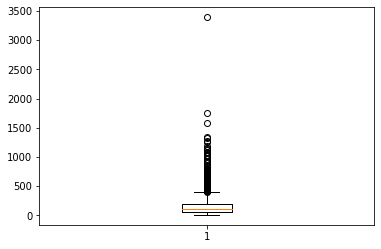

In [133]:
plt.boxplot(counts)

In [22]:
pd.DataFrame(counts).describe()

,0
count,2000.000000
mean,168.915000
std,186.859878
min,9.000000
25%,65.000000
50%,117.000000
75%,201.000000
max,3394.000000


In [25]:
size = 400
total = len(counts)
i = 0 
for x in counts:
    if x < size:
        i += 1
print("including ratio :",i/total)

including ratio : 0.9255


In [ ]:
token.fit

In [32]:
# - Word Index: keep the most frequent 10k words
vocab_size = 10000
token = Tokenizer(num_words = vocab_size + 1) # 상위 10000개 단어만 사용
token.fit_on_texts(df.review)
docs   = token.texts_to_sequences(df.review)

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
# 데이터 전처리
max_len = 400
xtr = pad_sequences(docs, maxlen=max_len)
# xte = sequence.pad_sequences(X_test, maxlen=max_len)